<a href="https://colab.research.google.com/github/Yassmina-Abdo/deep-learning/blob/main/02_CIFAR_10_ConvNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [30]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model, to_categorical
import numpy as np
import matplotlib.pyplot as plt
import random

## Load data

In [36]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Insights

In [37]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [38]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


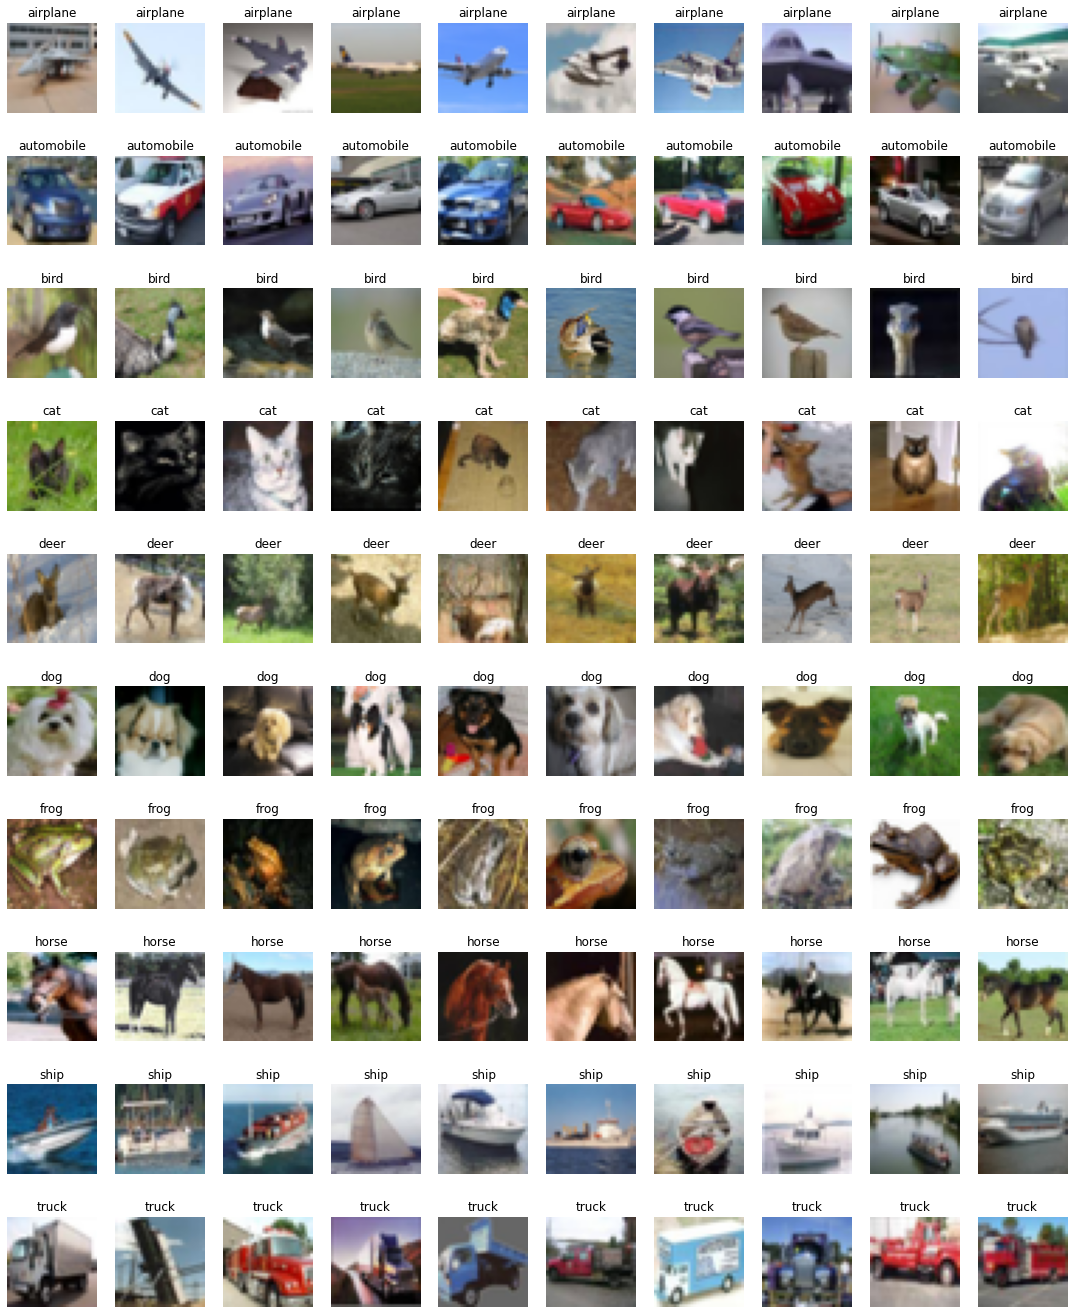

In [39]:
# SHOW IMAGE
cols = 10
rows = 10
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        index,_ = random.choice([(k, p) for k, row in enumerate(train_labels) for p, val in enumerate(row) if val == i])
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(train_images[index, :])
        ax.set_title(cifar10_classes[i])
plt.show()

## Preprocessing

In [40]:
#reshape
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [41]:
# One hot encoding for Y
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Model

##ConvNet

In [53]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32,3),name='conv1'))
model.add(layers.MaxPooling2D((2, 2),name='maxpool1'))
model.add(layers.Conv2D(64, (3, 3), activation='relu',name='conv2'))
model.add(layers.MaxPooling2D((2, 2),name='maxpool3'))
model.add(layers.Conv2D(64, (3, 3), activation='relu',name='conv3'))

## Dense

In [54]:
# Train and test a model with 3 fully connected layers with the following architecture: 512-256-128
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', name='Layer1'))
model.add(layers.Dense(256, activation='relu', name='Layer2'))
model.add(layers.Dense(128, activation='relu', name='Layer3'))
model.add(layers.Dense(64, activation='relu', name='Layer4'))
model.add(layers.Dense(64, activation='relu', name='Layer5'))
model.add(layers.Dense(32, activation='relu', name='Layer6'))
model.add(layers.Dense(10, activation='softmax', name='Output_Layer'))

In [55]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 maxpool3 (MaxPooling2D)     (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 1024)              0         
                                                                 
 Layer1 (Dense)              (None, 512)              

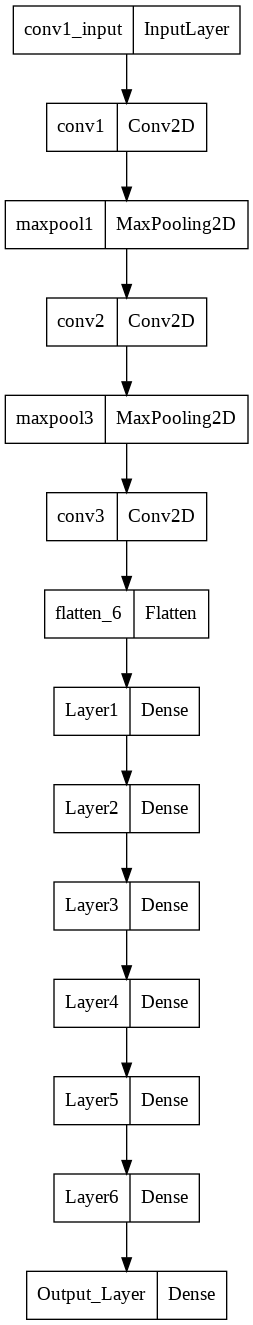

In [56]:
plot_model(model)

In [57]:
# Use adam optimizer with learning rate=10e-3
optimizer = Adam(learning_rate=10e-3)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
network_history = model.fit(train_images,train_labels , epochs=100, batch_size=1024,
                              validation_data=(test_images,test_labels),
                              callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)])

Epoch 1/100
49/49 [==============================] - 63s 1s/step - loss: 2.3257 - accuracy: 0.1087 - val_loss: 2.2956 - val_accuracy: 0.1101
Epoch 2/100
49/49 [==============================] - 63s 1s/step - loss: 2.1319 - accuracy: 0.1813 - val_loss: 2.0318 - val_accuracy: 0.2153
Epoch 3/100
49/49 [==============================] - 61s 1s/step - loss: 1.9950 - accuracy: 0.2279 - val_loss: 1.9070 - val_accuracy: 0.2545
Epoch 4/100
49/49 [==============================] - 60s 1s/step - loss: 1.8792 - accuracy: 0.2619 - val_loss: 1.7837 - val_accuracy: 0.3065
Epoch 5/100
49/49 [==============================] - 61s 1s/step - loss: 1.7684 - accuracy: 0.3226 - val_loss: 1.7331 - val_accuracy: 0.3488
Epoch 6/100
49/49 [==============================] - 61s 1s/step - loss: 1.7012 - accuracy: 0.3565 - val_loss: 1.6229 - val_accuracy: 0.3847
Epoch 7/100
49/49 [==============================] - 62s 1s/step - loss: 1.6400 - accuracy: 0.3870 - val_loss: 1.6008 - val_accuracy: 0.4022
Epoch 8/100
4

## Plotting Result

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

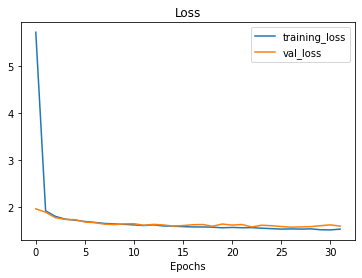

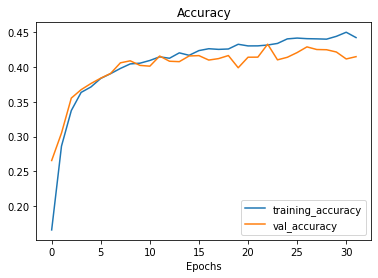

In [ ]:
plot_loss_curves(network_history)